In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
import time 
from sklearn.metrics import classification_report
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:

# Set the path to your dataset
dataset_path = "data1/NITROHCS_V1.0/"

In [ ]:
input_shape = (28, 28, 1) 

In [ ]:
# Define the number of classes
# num_classes = len(os.listdir(dataset_path))

In [35]:

# Load and preprocess the dataset
def load_dataset():
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = Image.open(image_path).convert("L")  # Convert to grayscale
            image = image.resize((input_shape[0], input_shape[1]))
            image = np.array(image) / 255.0  # Normalize pixel values
            image = np.expand_dims(image, axis=-1)  # Add channel dimension for CNN
            images.append(image)
            labels.append(class_names.index(class_name))
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [ ]:
labels = labels.reshape(-1, 1)
class_names = labels
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(labels).toarray()

images, Y = shuffle(images, Y, random_state=69)

x_train, x_test, y_train, y_test = train_test_split(
    images, Y, test_size=0.2, random_state=69)
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=69)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

In [36]:
# Load the dataset
images, labels = load_dataset()

In [37]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Reshape((1, 128)))  # Add a Reshape layer to convert the output shape to (batch_size, timesteps, input_dim)
model.add(LSTM(128))
model.add(Dense(num_classes, activation="softmax"))

In [39]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
tensorboard_callback = TensorBoard(log_dir='./logs')
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test),callbacks=[tensorboard_callback,time_callback])

Epoch 1/10
376/376 [==============================] - 64s 96ms/step - loss: 2.8227 - accuracy: 0.2557 - val_loss: 1.7962 - val_accuracy: 0.5030
Epoch 2/10
376/376 [==============================] - 22s 60ms/step - loss: 1.3698 - accuracy: 0.6179 - val_loss: 1.0598 - val_accuracy: 0.6985
Epoch 3/10
376/376 [==============================] - 14s 36ms/step - loss: 0.8432 - accuracy: 0.7668 - val_loss: 0.7405 - val_accuracy: 0.7929
Epoch 4/10
376/376 [==============================] - 14s 36ms/step - loss: 0.5551 - accuracy: 0.8572 - val_loss: 0.5580 - val_accuracy: 0.8457
Epoch 5/10
376/376 [==============================] - 20s 53ms/step - loss: 0.3686 - accuracy: 0.9123 - val_loss: 0.4087 - val_accuracy: 0.8890
Epoch 6/10
376/376 [==============================] - 27s 72ms/step - loss: 0.2500 - accuracy: 0.9501 - val_loss: 0.3149 - val_accuracy: 0.9232
Epoch 7/10
376/376 [==============================] - 26s 70ms/step - loss: 0.1505 - accuracy: 0.9771 - val_loss: 0.2077 - val_accuracy:

In [41]:
print (sum(time_callback.times))

274.78753685951233


In [42]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

94/94 [==============================] - 3s 21ms/step - loss: 0.0804 - accuracy: 0.9890
Test Loss: 0.08043067157268524
Test Accuracy: 0.9890292286872864


In [43]:
# Saving the model
pickle_out = open("model_trained_iitbbs_googlenet.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\reshape
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified           

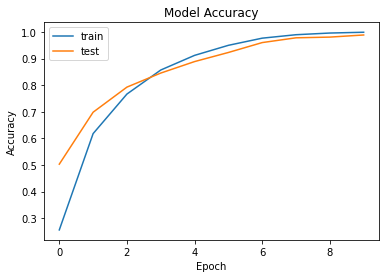

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

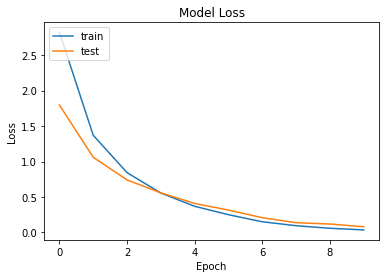

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

print('Classification Report')
print(classification_report(y_test,y_pred))

94/94 [==============================] - 8s 18ms/step
Classification Report


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets